In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import math

In [2]:

#
#   Clustering dataset by K-Means clustering algorithm
#



In [3]:
# Create initial k centrodids, using random values in range of given data space
def create_initial_centetorids(points:list,k:int):
    #print('cluter count:',k)
    # creating list of each separeted axis data 
    dim_data = list(zip(*points))
    # print('axis:', len(dim_data))

    min_max_for_axis=[]
    #find min max in each dimension
    for dim_values in dim_data:
        min_value = min(dim_values)
        max_value = max(dim_values)
        min_max_for_axis.append([min_value,max_value])
    # print("min max",min_max_for_axis)

    initial_centroids = []
    for c in range(0,k):
        centroid = []
        while True:
            for min_max in min_max_for_axis:
                centroid.append(min_max[0] + random.randint(0,100) * (min_max[1]-min_max[0])/100)
            if centroid not in initial_centroids:
                break
        initial_centroids.append(centroid)
    return initial_centroids


In [4]:
# Calculate euclidean distance between given two points
def cal_euclidean_distance(p1:list,p2:list):
    s = 0
    if len(p1) != len(p2):
        raise Exception('p1 and p2 are not in same dimension')
    for i in range(len(p1)):
        s +=  pow(p1[i] - p2[i],2)
    return pow(s,0.5)

In [5]:
from IPython.display import clear_output

# clustering points by minimizing distance from point to the centroid of cluster
# calculate mean point of the cluster
# set that point is the centroid of the cluster
def clustering(points:list,centroids:list,ittr:int):
    cluster_means = np.zeros((len(centroids),len(points[0])))
    clusterd_points = []
    for i in range(0,len(centroids)):
        clusterd_points.append([])
    for point in points:
        distances = []
        for centroid in centroids:
            distance =  cal_euclidean_distance(centroid,point)
            if math.isnan(distance):
                raise Exception("Distance not valud : input data not numeric")
            distances.append(distance)
        cluster= distances.index(min(distances))

        # each feature of the point is added to the cluster mean
        cluster_means[cluster] += point
        clusterd_points[cluster].append(point)
    for i in range(0,len(centroids)):
        # mean of the cluster is calculated
        cluster_means[i] = cluster_means[i]/len(clusterd_points[i])
        if len(clusterd_points[i])>0:
            X,Y = list(zip(*clusterd_points[i]))
            #Plot generated sample data
            plt.scatter(X,Y)
    X,Y = list(zip(*cluster_means))
    #Plot centroids
    plt.scatter(X,Y)
    plt.title("Basic K-Means cluster algorithm predictions : itteration "+str(ittr))
    display(plt.gcf())  # Display the current figure
    plt.pause(0.2)  # Pause to allow the plot to update
    clear_output(wait=True)  # Clear previous output in Jupyter Notebook
    return cluster_means



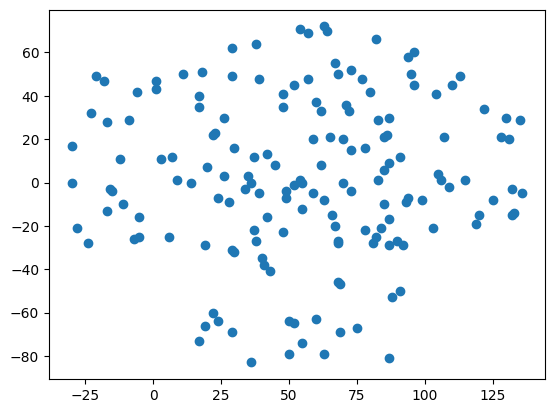

In [6]:
# Open dataset as pandas dataframe
df = pd.read_csv('./data/sample-dataset-for-clustering.csv')

# Remove empty data points if have
df = df.dropna()

plt.scatter(df['X'],df['Y'])
plt.show()



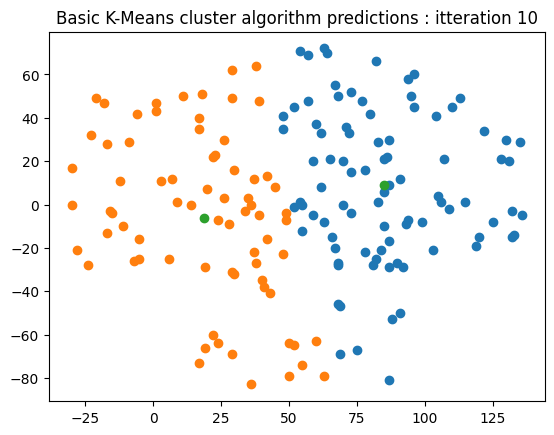

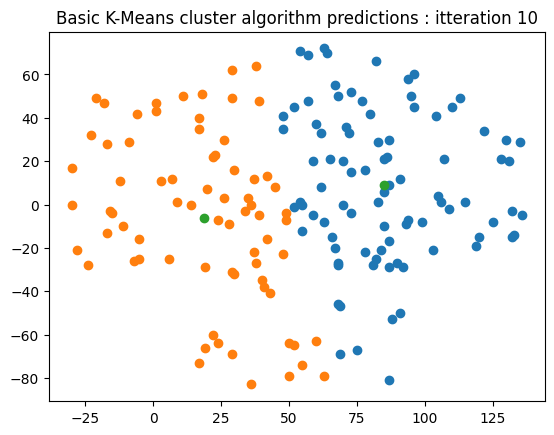

In [7]:
initial_centroids = create_initial_centetorids(df.values.tolist(),2)
print('initial_centroids',initial_centroids)

clear_output(wait=True)  # Clear previous output in Jupyter Notebook

for i in range(1,11):
    initial_centroids=clustering(df.values.tolist(),initial_centroids,i)
    #print(initial_centroids)


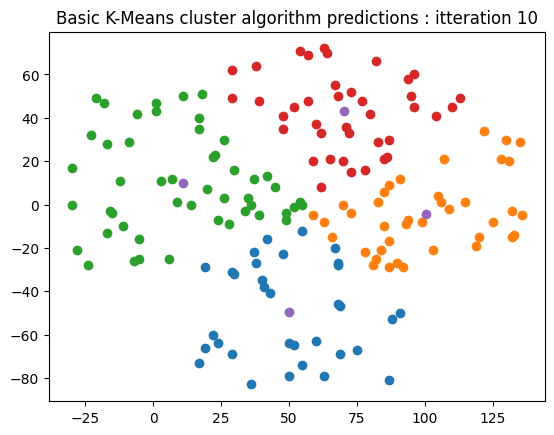

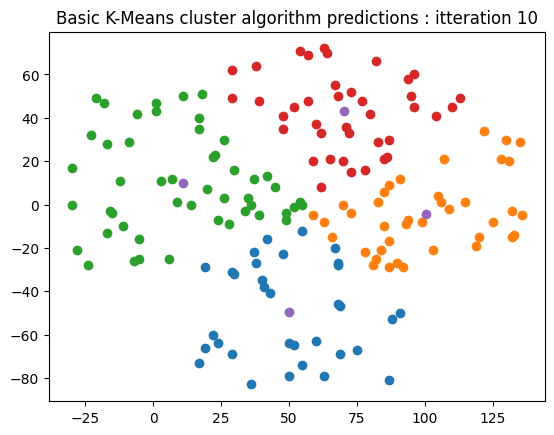

In [8]:
initial_centroids = create_initial_centetorids(df.values.tolist(),4)
print('initial_centroids',initial_centroids)

clear_output(wait=True)  # Clear previous output in Jupyter Notebook

for i in range(1,11):
    initial_centroids=clustering(df.values.tolist(),initial_centroids,i)
    #print(initial_centroids)
